In [46]:
import pandas as pd
import numpy as np
import ast
import pickle
import nltk
import re
import string
from nltk.tokenize import word_tokenize
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [47]:
df = pd.read_csv("New Scrap.csv", usecols=["tweet", "Sentimen"])
df.columns = ["tweet", "sentimen"]
df['sentimen'].value_counts(ascending=True)
#df.shape

Negatif    112
Positif    119
Netral     159
Name: sentimen, dtype: int64

In [48]:
def word_rekonizing(text):
  return word_tokenize(text)

df['tweet'] = df['tweet'].apply(word_rekonizing)
datatweet = df['tweet']
datatweet.head(10)

0    [jadi, pengen, urging, kalian, aja, yang, seha...
1    [erick, thohir, mengatakan, indonesia, memilik...
2    [pemerintah, terus, berupaya, keras, untuk, me...
3    [alamdulillah, pokoknya, jgn, pernah, nyopot, ...
4                    [lanjutkan, vaksin, merah, putih]
5    [pemerintahan, jokowi, kembali, menerima, kiri...
6    [kalau, kalian, di, pekanbaru, dan, eligible, ...
7    [enggak, usah, degan, vaksin, aman, kok, ku, j...
8    [erick, thohir, terima, 8, juta, bulk, vaksin,...
9    [amankan, kebutuhan, vaksin, pemerintah, kemba...
Name: tweet, dtype: object

In [49]:
#normalisasi
norm = pd.read_excel("baru normalisasi.xlsx")

In [50]:
dict_normalisasi = {}

for index, row in norm.iterrows():
    if row[0] not in dict_normalisasi:
        dict_normalisasi[row[0]]= row[1]

def normalisasi_term(data):
    return [dict_normalisasi[term] if term in dict_normalisasi else term for term in data]

df['tweet'] = df['tweet'].apply(normalisasi_term)
df['tweet'].head(10)

0    [jadi, pengen, urging, kalian, saja, yang, seh...
1    [erick, thohir, mengatakan, indonesia, memilik...
2    [pemerintah, terus, berupaya, keras, untuk, me...
3    [alamdulillah, pokoknya, jangan, pernah, nyopo...
4                    [lanjutkan, vaksin, merah, putih]
5    [pemerintahan, jokowi, kembali, menerima, kiri...
6    [kalau, kalian, di, pekanbaru, dan, eligible, ...
7    [enggak, perlu, degan, vaksin, aman, kok, aku,...
8    [erick, thohir, terima, 8, juta, bulk, vaksin,...
9    [amankan, kebutuhan, vaksin, pemerintah, kemba...
Name: tweet, dtype: object

In [51]:
from nltk.corpus import stopwords

In [52]:
list_stopwords = stopwords.words('indonesian')

list_stopwords.extend(["yg", "dg", "rt", "dgn", "ny", "d", 'klo', 
                      'kalo', 'amp', 'biar', 'bikin', 'bilang', 
                       'gak', 'ga', 'krn', 'nya', 'nih', 'sih', 
                       'si', 'tau', 'tdk', 'tuh', 'utk', 'ya', 
                       'jd', 'jgn', 'sdh', 'aja', 'n', 't', 
                       'nyg', 'hehe', 'pen', 'u', 'nan', 'loh', 'rt',
                       '&amp', 'yah', 'kali', 'wkwkwk', 'udh',
                       'oke', 'deh', 'tu', 'jg', 'lo', 'blm', 'yaa',
                       'pas', 'gitu', 'dapet', 'anjir', 'abg', 'eh', 'tetep',' ya'])
#convert list to dictionary
list_stopwords = set(list_stopwords)

In [53]:
#remove stopword pada list token
def stopwords_removal(words):
    return [word for word in words if word not in list_stopwords]

df['tweet'] = df['tweet'].apply(stopwords_removal) 


print(df['tweet'].head())

0    [pengen, urging, sehat, divaksin, please, go, ...
1    [erick, thohir, indonesia, memiliki, 759, juta...
2    [pemerintah, berupaya, keras, menghadirkan, va...
3    [alamdulillah, pokoknya, nyopot, masker, gusss...
4                    [lanjutkan, vaksin, merah, putih]
Name: tweet, dtype: object


In [54]:
print("dimensi df :", df.shape)

dimensi df : (390, 2)


In [100]:
dfr = df.sample(frac=.50)
if (0.50*(len(df))== len(dfr)):
    print( "Cool")
    print(len(df), len(dfr))
#display
dfr

Cool
390 195


,tweet,sentimen
144,"[egosi, ajalah, intinya, pakai, masker, pakai,...",Netral
201,"[vaksin, pis, eligible, kriteria, divaksin]",Netral
124,"[2x, vaksin, jangka, 3bulanan, vaksin, ipb, eh...",Netral
288,"[goblog, dipiara, anak, tetangga, divaksin, ca...",Negatif
243,"[alhamdulillah, siang, tambahan, 8, juta, vaks...",Netral
...,...,...
4,"[lanjutkan, vaksin, merah, putih]",Positif
188,"[perkucingan, gede, vaksin, anak, 3]",Netral
9,"[amankan, kebutuhan, vaksin, pemerintah, datan...",Positif
8,"[erick, thohir, terima, 8, juta, bulk, vaksin,...",Positif


In [102]:
dfa= df.drop(dfr.index)
dfa.head()

,tweet,sentimen
0,"[pengen, urging, sehat, divaksin, please, go, ...",Positif
1,"[erick, thohir, indonesia, memiliki, 759, juta...",Positif
3,"[alamdulillah, pokoknya, nyopot, masker, gusss...",Positif
5,"[pemerintahan, jokowi, menerima, kiriman, vaks...",Positif
7,"[degan, vaksin, aman, suntik, glombang, bulang...",Positif


In [104]:
x=df["tweet"]
y=df["sentimen"]
print(x)
print(y)

0      [pengen, urging, sehat, divaksin, please, go, ...
1      [erick, thohir, indonesia, memiliki, 759, juta...
2      [pemerintah, berupaya, keras, menghadirkan, va...
3      [alamdulillah, pokoknya, nyopot, masker, gusss...
4                      [lanjutkan, vaksin, merah, putih]
                             ...                        
385                               [vaksin, pengangguran]
386    [iya, lambat, vaksin, lokal, keburu, bubaran, ...
387    [masyarakat, takut, vaksin, walikota, kendari,...
388    [vaksinnya, ngga, vaksin, prewe, kampus, aing,...
389    [vaksin, prosedurnya, susah, males, klu, klu, ...
Name: tweet, Length: 390, dtype: object
0      Positif
1      Positif
2      Positif
3      Positif
4      Positif
        ...   
385    Negatif
386    Negatif
387    Negatif
388    Negatif
389    Negatif
Name: sentimen, Length: 390, dtype: object


In [105]:
#tf 
def calc_TF(document):
    # Counts the number of times the word appears in review
    TF_dict = {}
    for term in document:
        if term in TF_dict:
            TF_dict[term] += 1
        else:
            TF_dict[term] = 1
    # Computes tf for each word
    for term in TF_dict:
        TF_dict[term] = TF_dict[term] / len(document)
    return TF_dict

df['TF_dict'] = df["tweet"].apply(calc_TF)
df["TF_dict"]
#df["TF_dict"] = df['tweet'].apply(calc_TF)
#df["TF_dict"].head(10)

0      {'pengen': 0.043478260869565216, 'urging': 0.0...
1      {'erick': 0.043478260869565216, 'thohir': 0.04...
2      {'pemerintah': 0.03571428571428571, 'berupaya'...
3      {'alamdulillah': 0.09090909090909091, 'pokokny...
4      {'lanjutkan': 0.25, 'vaksin': 0.25, 'merah': 0...
                             ...                        
385                 {'vaksin': 0.5, 'pengangguran': 0.5}
386    {'iya': 0.14285714285714285, 'lambat': 0.14285...
387    {'masyarakat': 0.14285714285714285, 'takut': 0...
388    {'vaksinnya': 0.125, 'ngga': 0.125, 'vaksin': ...
389    {'vaksin': 0.06666666666666667, 'prosedurnya':...
Name: TF_dict, Length: 390, dtype: object

In [12]:
#idf
def calc_DF(tfDict):
    count_DF = {}
    # Run through each document's tf dictionary and increment countDict's (term, doc) pair
    for document in tfDict:
        for term in document:
            if term in count_DF:
                count_DF[term] += 1
            else:
                count_DF[term] = 1
    return count_DF


DF = calc_DF(df["TF_dict"])
#DF

In [13]:
n_document = len(df)

def calc_IDF(__n_document, __DF):
    IDF_Dict = {}
    for term in __DF:
        IDF_Dict[term] = np.log(__n_document / (__DF[term] + 1))
    return IDF_Dict
  
#Stores the idf dictionary
IDF = calc_IDF(n_document, DF)


In [14]:
#calc TF-IDF
def calc_TF_IDF(TF):
    TF_IDF_Dict = {}
    #For each word in the review, we multiply its tf and its idf.
    for key in TF:
        TF_IDF_Dict[key] = TF[key] * IDF[key]
    return TF_IDF_Dict

#Stores the TF-IDF Series
df["TF-IDF_dict"] = df["TF_dict"].apply(calc_TF_IDF)
df["TF-IDF_dict"].head()
#hasil_tfidf = dftrain["TF-IDF_dict"]
#hasil_tfidf

0    {'pengen': 0.21163193262850358, 'urging': 0.22...
1    {'erick': 0.16898718249755895, 'thohir': 0.174...
2    {'pemerintah': 0.10109473297123366, 'berupaya'...
3    {'alamdulillah': 0.4793635962330679, 'pokoknya...
4    {'lanjutkan': 1.3182498896409367, 'vaksin': 0....
Name: TF-IDF_dict, dtype: object

In [15]:
# sort descending by value for DF dictionary 
sorted_DF = sorted(calc_DF(df["TF_dict"][df["sentimen"] == "Positif"]).items(), key=lambda kv: kv[1], reverse=True)[:10]

# Create a list of unique words from sorted dictionay `sorted_DF`
unique_term = [item[0] for item in sorted_DF]

def calc_TF_IDF_Vec(__TF_IDF_Dict):
    TF_IDF_vector = [0.0] * len(unique_term)

    # For each unique word, if it is in the review, store its TF-IDF value.
    for i, term in enumerate(unique_term):
        if term in __TF_IDF_Dict:
            TF_IDF_vector[i] = __TF_IDF_Dict[term]
    return TF_IDF_vector

df["TF_IDF_Vec"] = df["TF-IDF_dict"][df['sentimen'] == 'Positif'].apply(calc_TF_IDF_Vec)

print("print first row matrix TF_IDF_Vec Series\n")
print(df["TF_IDF_Vec"][df['sentimen'] == 'Positif'])

print("\nmatrix size : ", len(df["TF_IDF_Vec"][df['sentimen'] == 'Positif']))

print first row matrix TF_IDF_Vec Series

0      [0.0007874673888280914, 0.0, 0.0, 0.0, 0.0, 0....
1      [0.0007874673888280914, 0.1980232421747614, 0....
2      [0.001293696424503293, 0.08133097446463414, 0....
3      [0.0016465227220951004, 0.0, 0.0, 0.0, 0.0, 0....
4      [0.004527937485761526, 0.0, 0.0, 0.0, 0.0, 0.0...
                             ...                        
114    [0.006037249981015368, 0.0, 0.0, 0.0, 0.0, 0.0...
115    [0.004527937485761526, 0.0, 0.0, 0.0, 0.0, 0.0...
116    [0.0, 0.0, 0.0, 0.0, 0.0, 0.4513417001837017, ...
117    [0.0006468482122516465, 0.0, 0.0, 0.0, 0.0, 0....
118    [0.0010653970554733003, 0.0, 0.0, 0.0, 0.0, 0....
Name: TF_IDF_Vec, Length: 119, dtype: object

matrix size :  119


In [16]:
# Convert Series to List
TF_IDF_Vec_List = np.array(df["TF_IDF_Vec"][df['sentimen'] == 'Positif'].to_list())

# Sum element vector in axis=0 
sums = TF_IDF_Vec_List.sum(axis=0)

data = []

for col, term in enumerate(unique_term):
    data.append((term, sums[col]))
    
rankingPos = pd.DataFrame(data, columns=['term', 'rank'])
rankingPos.sort_values('rank', ascending=False)

,term,rank
1,juta,6.635892
3,dosis,5.605287
2,indonesia,4.552397
5,vaksinasi,3.699357
8,sinovac,3.676219
7,baku,3.395126
6,bahan,3.339360
9,pemerintah,3.220683
4,covid19,3.196804
0,vaksin,0.309589


In [17]:
# sort descending by value for DF dictionary 
sorted_DF = sorted(calc_DF(df["TF_dict"][df["sentimen"] == "Negatif"]).items(), key=lambda kv: kv[1], reverse=True)[:10]

# Create a list of unique words from sorted dictionay `sorted_DF`
unique_term = [item[0] for item in sorted_DF]

def calc_TF_IDF_Vec(__TF_IDF_Dict):
    TF_IDF_vector = [0.0] * len(unique_term)

    # For each unique word, if it is in the review, store its TF-IDF value.
    for i, term in enumerate(unique_term):
        if term in __TF_IDF_Dict:
            TF_IDF_vector[i] = __TF_IDF_Dict[term]
    return TF_IDF_vector

df["TF_IDF_Vec"] = df["TF-IDF_dict"][df['sentimen'] == 'Negatif'].apply(calc_TF_IDF_Vec)

print("print first row matrix TF_IDF_Vec Series\n")
print(df["TF_IDF_Vec"][df['sentimen'] == 'Negatif'])

print("\nmatrix size : ", len(df["TF_IDF_Vec"][df['sentimen'] == 'Negatif']))

print first row matrix TF_IDF_Vec Series

278    [0.0027864230681609392, 0.0, 0.0, 0.0, 0.23243...
279    [0.0006037249981015368, 0.08901032910397877, 0...
280    [0.0007874673888280914, 0.0, 0.0, 0.0, 0.0, 0....
281    [0.006037249981015368, 0.0, 0.0, 0.0, 0.0, 0.0...
282    [0.0027864230681609392, 0.0, 0.0, 0.0, 0.23243...
                             ...                        
385    [0.009055874971523051, 0.0, 0.0, 0.0, 0.0, 0.0...
386    [0.002587392849006586, 0.0, 0.0, 0.0, 0.0, 0.0...
387    [0.002587392849006586, 0.0, 0.0, 0.0, 0.0, 0.0...
388    [0.002263968742880763, 0.0, 0.0, 0.0, 0.0, 0.0...
389    [0.0012074499962030736, 0.0, 0.0, 0.1980276310...
Name: TF_IDF_Vec, Length: 112, dtype: object

matrix size :  112


In [18]:
# Convert Series to List
TF_IDF_Vec_List = np.array(df["TF_IDF_Vec"][df['sentimen'] == 'Negatif'].to_list())

# Sum element vector in axis=0 
sums = TF_IDF_Vec_List.sum(axis=0)

data = []

for col, term in enumerate(unique_term):
    data.append((term, sums[col]))
    
rankingNeg = pd.DataFrame(data, columns=['term', 'rank'])
rankingNeg.sort_values('rank', ascending=False)

,term,rank
6,mati,3.685168
3,selesai,3.588159
1,orang,3.442410
4,divaksin,2.948010
2,covid19,2.741055
9,takut,2.473329
5,2,1.924562
8,covid,1.738674
7,indonesia,0.919606
0,vaksin,0.308759


In [19]:
# sort descending by value for DF dictionary 
sorted_DF = sorted(calc_DF(df["TF_dict"][df["sentimen"] == "Netral"]).items(), key=lambda kv: kv[1], reverse=True)[:10]

# Create a list of unique words from sorted dictionay `sorted_DF`
unique_term = [item[0] for item in sorted_DF]

def calc_TF_IDF_Vec(__TF_IDF_Dict):
    TF_IDF_vector = [0.0] * len(unique_term)

    # For each unique word, if it is in the review, store its TF-IDF value.
    for i, term in enumerate(unique_term):
        if term in __TF_IDF_Dict:
            TF_IDF_vector[i] = __TF_IDF_Dict[term]
    return TF_IDF_vector

df["TF_IDF_Vec"] = df["TF-IDF_dict"][df['sentimen'] == 'Netral'].apply(calc_TF_IDF_Vec)

print("print first row matrix TF_IDF_Vec Series\n")
print(df["TF_IDF_Vec"][df['sentimen'] == 'Netral'])

print("\nmatrix size : ", len(df["TF_IDF_Vec"][df['sentimen'] == 'Netral']))

print first row matrix TF_IDF_Vec Series

119    [0.0017249285660043906, 0.20566516660508305, 0...
120    [0.000754656247626921, 0.0, 0.0, 0.0, 0.130538...
121    [0.0006245431014843484, 0.0, 0.0, 0.0, 0.0, 0....
122    [0.001509312495253842, 0.0, 0.0, 0.0, 0.0, 0.0...
123    [0.0020699142792052687, 0.061699549981524916, ...
                             ...                        
273    [0.002414899992406147, 0.0, 0.1646426118438141...
274    [0.002263968742880763, 0.2699355311691715, 0.0...
275    [0.0020124166603384557, 0.0, 0.0, 0.0, 0.0, 0....
276    [0.004527937485761526, 0.0, 0.0, 0.0, 0.0, 0.0...
277    [0.0012074499962030736, 0.0, 0.0, 0.0, 0.0, 0....
Name: TF_IDF_Vec, Length: 159, dtype: object

matrix size :  159


In [20]:
# Convert Series to List
TF_IDF_Vec_List = np.array(df["TF_IDF_Vec"][df['sentimen'] == 'Netral'].to_list())

# Sum element vector in axis=0 
sums = TF_IDF_Vec_List.sum(axis=0)

data = []

for col, term in enumerate(unique_term):
    data.append((term, sums[col]))
    
rankingNet = pd.DataFrame(data, columns=['term', 'rank'])
rankingNet.sort_values('rank', ascending=False)

,term,rank
2,sinovac,4.240616
6,ya,3.912109
8,suntik,3.785142
1,indonesia,3.562652
3,juta,2.874958
4,banget,2.748011
7,dosis,2.557788
5,covid,2.210483
9,covid19,1.796200
0,vaksin,0.425607


In [21]:
feature = pd.concat([rankingPos,rankingNeg,rankingNet],axis=0,ignore_index=True)
feature.columns = ["term", "ranking"]
#feature.columns = ["termPositif", "rankingPositif", "termNegatif", "rankingNegatif", "termNetral", "rankingNetral",]
feature

,term,ranking
0,vaksin,0.309589
1,juta,6.635892
2,indonesia,4.552397
3,dosis,5.605287
4,covid19,3.196804
5,vaksinasi,3.699357
6,bahan,3.339360
7,baku,3.395126
8,sinovac,3.676219
9,pemerintah,3.220683


In [22]:
fitur = feature.drop_duplicates(subset='term', keep="first")
fitur

,term,ranking
0,vaksin,0.309589
1,juta,6.635892
2,indonesia,4.552397
3,dosis,5.605287
4,covid19,3.196804
5,vaksinasi,3.699357
6,bahan,3.339360
7,baku,3.395126
8,sinovac,3.676219
9,pemerintah,3.220683


In [23]:
keyword_list = fitur["term"].values.tolist()
print (keyword_list)

['vaksin', 'juta', 'indonesia', 'dosis', 'covid19', 'vaksinasi', 'bahan', 'baku', 'sinovac', 'pemerintah', 'orang', 'selesai', 'divaksin', '2', 'mati', 'covid', 'takut', 'banget', 'ya ', 'suntik']


In [24]:
dseries = df["TF-IDF_dict"].apply(pd.Series)
new_dseries = dseries.fillna(0)
dtfidf = pd.DataFrame(new_dseries, columns=keyword_list)
dtfidf

,vaksin,juta,indonesia,dosis,covid19,vaksinasi,bahan,baku,sinovac,pemerintah,orang,selesai,divaksin,2,mati,covid,takut,banget,ya,suntik
0,0.000787,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.131379,0.000000,0.0,0.0,0.000000,0.272429,0.000000,0.0
1,0.000787,0.198023,0.281672,0.103593,0.099012,0.000000,0.000000,0.000000,0.000000,0.000000,0.1161,0.000000,0.000000,0.127027,0.0,0.0,0.000000,0.000000,0.000000,0.0
2,0.001294,0.081331,0.077124,0.085094,0.081331,0.096716,0.104344,0.106086,0.088201,0.101095,0.0000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0
3,0.001647,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0
4,0.004528,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,0.009056,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0
386,0.002587,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0
387,0.002587,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.0,0.0,0.475298,0.000000,0.000000,0.0
388,0.002264,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0


In [39]:
x_train, x_test, y_train, y_test = train_test_split(dtfidf, y, test_size = 0.2)
print(x_train)
print(y_test.shape)

       vaksin  juta  indonesia  dosis   covid19  vaksinasi  bahan  baku  \
106  0.012074   0.0        0.0    0.0  0.000000        0.0    0.0   0.0   
67   0.003196   0.0        0.0    0.0  0.133957        0.0    0.0   0.0   
77   0.003622   0.0        0.0    0.0  0.000000        0.0    0.0   0.0   
271  0.003019   0.0        0.0    0.0  0.000000        0.0    0.0   0.0   
356  0.003293   0.0        0.0    0.0  0.000000        0.0    0.0   0.0   
..        ...   ...        ...    ...       ...        ...    ...   ...   
333  0.002860   0.0        0.0    0.0  0.000000        0.0    0.0   0.0   
165  0.000755   0.0        0.0    0.0  0.000000        0.0    0.0   0.0   
147  0.002587   0.0        0.0    0.0  0.000000        0.0    0.0   0.0   
387  0.002587   0.0        0.0    0.0  0.000000        0.0    0.0   0.0   
358  0.001811   0.0        0.0    0.0  0.000000        0.0    0.0   0.0   

     sinovac  pemerintah     orang   selesai  divaksin    2  mati     covid  \
106      0.0    0.00

In [40]:
nb = MultinomialNB()
nb.fit(x_train,y_train)
prediksi = nb.predict(x_test)

In [41]:
from sklearn import metrics

In [42]:
print('\n akurasi', metrics.accuracy_score(y_test,prediksi))
print('\n ak', metrics.classification_report(y_test,prediksi))


 akurasi 0.47435897435897434

 ak               precision    recall  f1-score   support

     Negatif       0.75      0.12      0.21        25
      Netral       0.43      0.94      0.59        31
     Positif       0.83      0.23      0.36        22

    accuracy                           0.47        78
   macro avg       0.67      0.43      0.38        78
weighted avg       0.64      0.47      0.40        78



<AxesSubplot:xlabel='sentimen'>

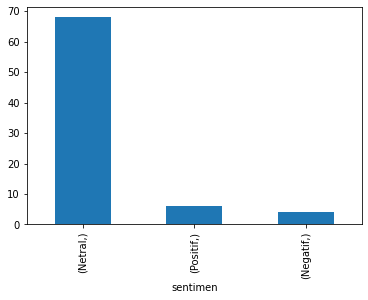

In [43]:
df1 = pd.DataFrame(prediksi, columns=['sentimen'])
df1.value_counts().plot(kind='bar')